In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets
### grassknoted/asl-alphabet
#### Using Python/Pandas

In [92]:
rootdir = 'asl_alphabet_train'
filepaths = []
for root, subdirs, files in os.walk(rootdir):
    for filename in files:
        filepath = os.path.join(root, filename)
        filepaths.append(filepath)
df = pd.DataFrame({ 'filepath': filepaths })
df

,filepath
0,asl_alphabet_train/asl_alphabet_train/.DS_Store
1,asl_alphabet_train/asl_alphabet_train/R/R2837.jpg
2,asl_alphabet_train/asl_alphabet_train/R/R2189.jpg
3,asl_alphabet_train/asl_alphabet_train/R/R1480.jpg
4,asl_alphabet_train/asl_alphabet_train/R/R1494.jpg
...,...
86996,asl_alphabet_train/asl_alphabet_train/W/W2943.jpg
86997,asl_alphabet_train/asl_alphabet_train/W/W407.jpg
86998,asl_alphabet_train/asl_alphabet_train/W/W1292.jpg
86999,asl_alphabet_train/asl_alphabet_train/W/W361.jpg


Extract file names from file paths.

Extract class and image index from filename.

In [94]:
import os.path 
# filename
df['filename'] = df['filepath'].map(os.path.basename)
# class and index
regex = r'(?P<class>[a-zA-Z]+)(?P<index>[0-9]+).jpg'
class_index = df['filename'].str.extract(regex)
df = df.join(class_index)
# drop NaN classes and indexes
df = df.drop(df[df['class'].isna() | df['index'].isna()].index)
df

,filepath,filename,class,index
1,asl_alphabet_train/asl_alphabet_train/R/R2837.jpg,R2837.jpg,R,2837
2,asl_alphabet_train/asl_alphabet_train/R/R2189.jpg,R2189.jpg,R,2189
3,asl_alphabet_train/asl_alphabet_train/R/R1480.jpg,R1480.jpg,R,1480
4,asl_alphabet_train/asl_alphabet_train/R/R1494.jpg,R1494.jpg,R,1494
5,asl_alphabet_train/asl_alphabet_train/R/R2823.jpg,R2823.jpg,R,2823
...,...,...,...,...
86996,asl_alphabet_train/asl_alphabet_train/W/W2943.jpg,W2943.jpg,W,2943
86997,asl_alphabet_train/asl_alphabet_train/W/W407.jpg,W407.jpg,W,407
86998,asl_alphabet_train/asl_alphabet_train/W/W1292.jpg,W1292.jpg,W,1292
86999,asl_alphabet_train/asl_alphabet_train/W/W361.jpg,W361.jpg,W,361


In [95]:
df['class'].unique()

array(['R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del',
       'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B',
       'K', 'L', 'Y', 'P', 'W'], dtype=object)

Find distribution of classes

<AxesSubplot:xlabel='class', ylabel='Count'>

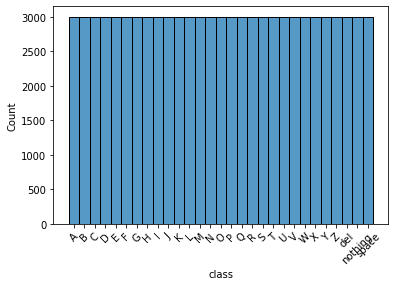

In [96]:
plt.xticks(rotation=45)
sns.histplot(data=df.sort_values('class'), x='class')

Display some example images.

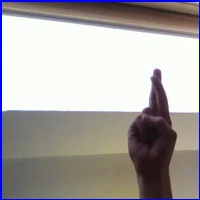

In [97]:
from IPython.display import Image
Image(filename=df['filepath'].values[0])

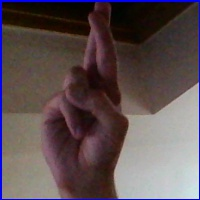

In [98]:
Image(filename=df['filepath'].values[1])

#### Keras/Tensorflow style
Do the same, but now Keras/Tensorflow style

In [2]:
import tensorflow as tf
tf

<module 'tensorflow' from '/Users/dunnkers/Library/Python/3.8/lib/python/site-packages/tensorflow/__init__.py'>

In [ ]:
model.predict

In [102]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'asl_alphabet_train/asl_alphabet_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)
train_ds

Found 87000 files belonging to 29 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None, 29)), types: (tf.float32, tf.float32)>

In [151]:
class_names = np.array(train_ds.class_names)
class_names

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'nothing', 'space'], dtype='<U7')

Text(0.5, 1.0, "['P']")

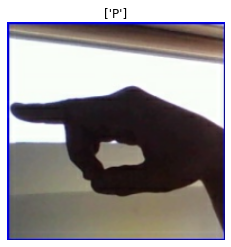

In [182]:
first_batch = iter(train_ds.take(1))
first_sample = next(first_batch)
images, labels = first_sample

i = 0
label, = np.where(labels[i])
image = images[i]
plt.imshow(image.numpy().astype("uint8"))
plt.axis("off")
plt.title(class_names[label])

### grassknoted/asl-alphabet

In [9]:
import subprocess as sp
data_dir = sp.getoutput('sh data_dir.sh')
data_dir

'./datasets'

In [7]:
d1 = tf.keras.preprocessing.image_dataset_from_directory(
    'asl_dataset/',
    image_size=(224, 224)
)
d1

FileNotFoundError: [Errno 2] No such file or directory: 'asl_dataset/'

In [5]:
d3 = tf.keras.preprocessing.image_dataset_from_directory(
    'datasets/Gesture Image Data',
    image_size=(224, 224)
)
d3

Found 55500 files belonging to 37 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [6]:
d3.class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '_']